In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/My Drive/Dataset.zip'

Archive:  /content/drive/My Drive/Dataset.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
card_dataset = '/content/drive/My Drive/Dataset/creditcard.csv'

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [4]:
import pandas as pd
import numpy as np
creditcard = pd.read_csv(card_dataset)
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
creditcard.duplicated().sum()

1081

In [7]:
creditcard[creditcard.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


Removing all the duplicate rows,keeping the last

In [8]:
creditcard.drop_duplicates(keep='last',inplace=True)

In [9]:
creditcard.reset_index(inplace = True, drop = True)

In [10]:
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
creditcard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values in any of the columns

In [12]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [13]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [14]:
creditcard['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

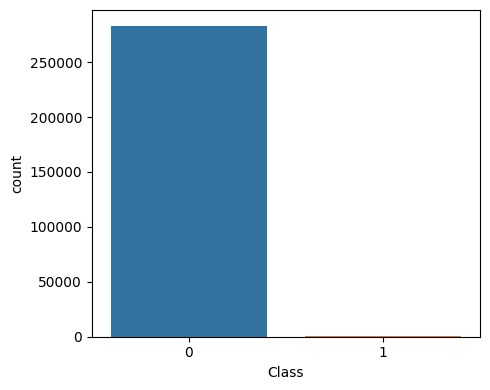

In [15]:
fig,ax=plt.subplots(figsize=(5,4))
ax=sns.countplot(x='Class',data=creditcard)
plt.tight_layout()

We can see from this countplot, the classes 0 & 1 are highly imbalanced hence if we run the model on such imbalanced data we may end up highly overfitting it on the data.

Hence, we will perform **Synthetic Minority Oversampling**  later on the data to balance it out.





**Visualization of Count of Transactions over Hours**

<ipython-input-16-2982873752cc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time_hrs'],bins=48)


Text(0.5, 1.0, 'Transaction Times')

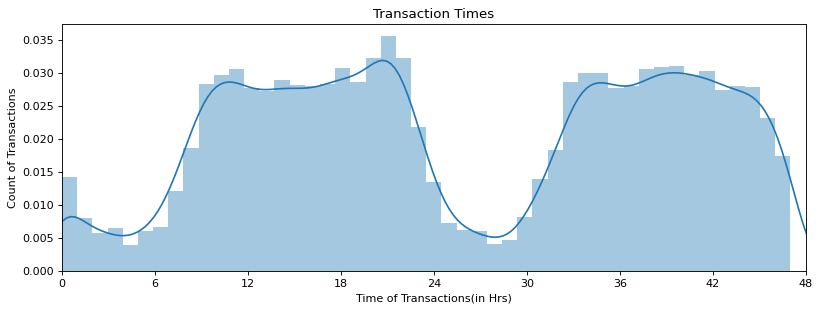

In [16]:
df=creditcard.copy()
df['Time_hrs'] = df['Time'] // 3600
plt.figure(figsize=(12,4),dpi=80)
sns.distplot(df['Time_hrs'],bins=48)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time of Transactions(in Hrs)')
plt.ylabel('Count of Transactions')
plt.title('Transaction Times')

**Non-Fraud Transactions**

<ipython-input-17-6fa10f84526f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class']==0]['Time_hrs'],bins=48)


Text(0.5, 1.0, 'Non-fraud Transaction Times')

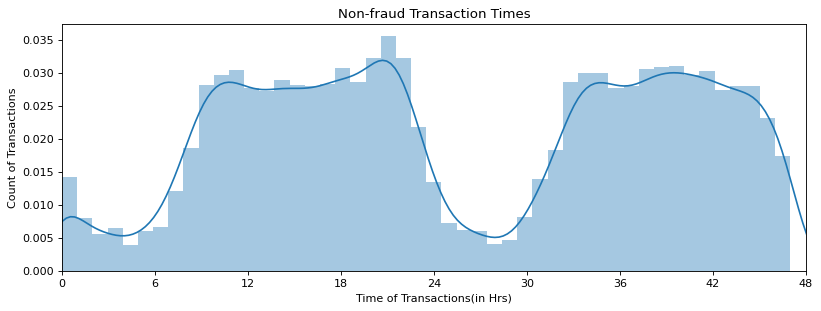

In [17]:
plt.figure(figsize=(12,4),dpi=80)
sns.distplot(df[df['Class']==0]['Time_hrs'],bins=48)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time of Transactions(in Hrs)')
plt.ylabel('Count of Transactions')
plt.title('Non-fraud Transaction Times')

**Fraud Transactions**

<ipython-input-18-b10858ff0ae5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class']==1]['Time_hrs'],bins=48)


Text(0.5, 1.0, 'Fraud Transaction Times')

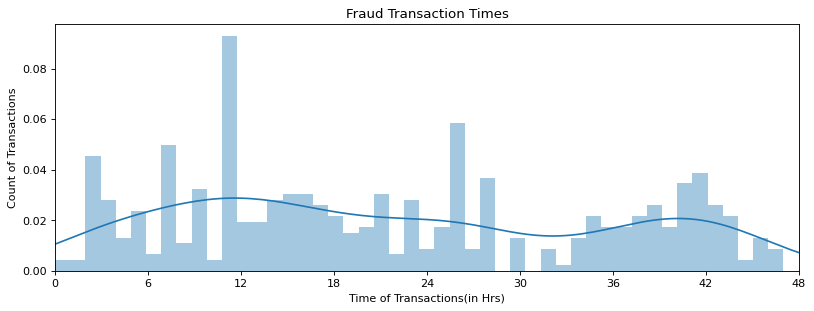

In [18]:
plt.figure(figsize=(12,4),dpi=80)
sns.distplot(df[df['Class']==1]['Time_hrs'],bins=48)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time of Transactions(in Hrs)')
plt.ylabel('Count of Transactions')
plt.title('Fraud Transaction Times')

We see,that the number of transactions for genuine users take a hit during night and early morning hours. It also makes sense since most people sleep during this. On the contrary, for fraudulent transactions, the transactions has a sharp spikes during late hours, and during the daytime, the count is significantly less.

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

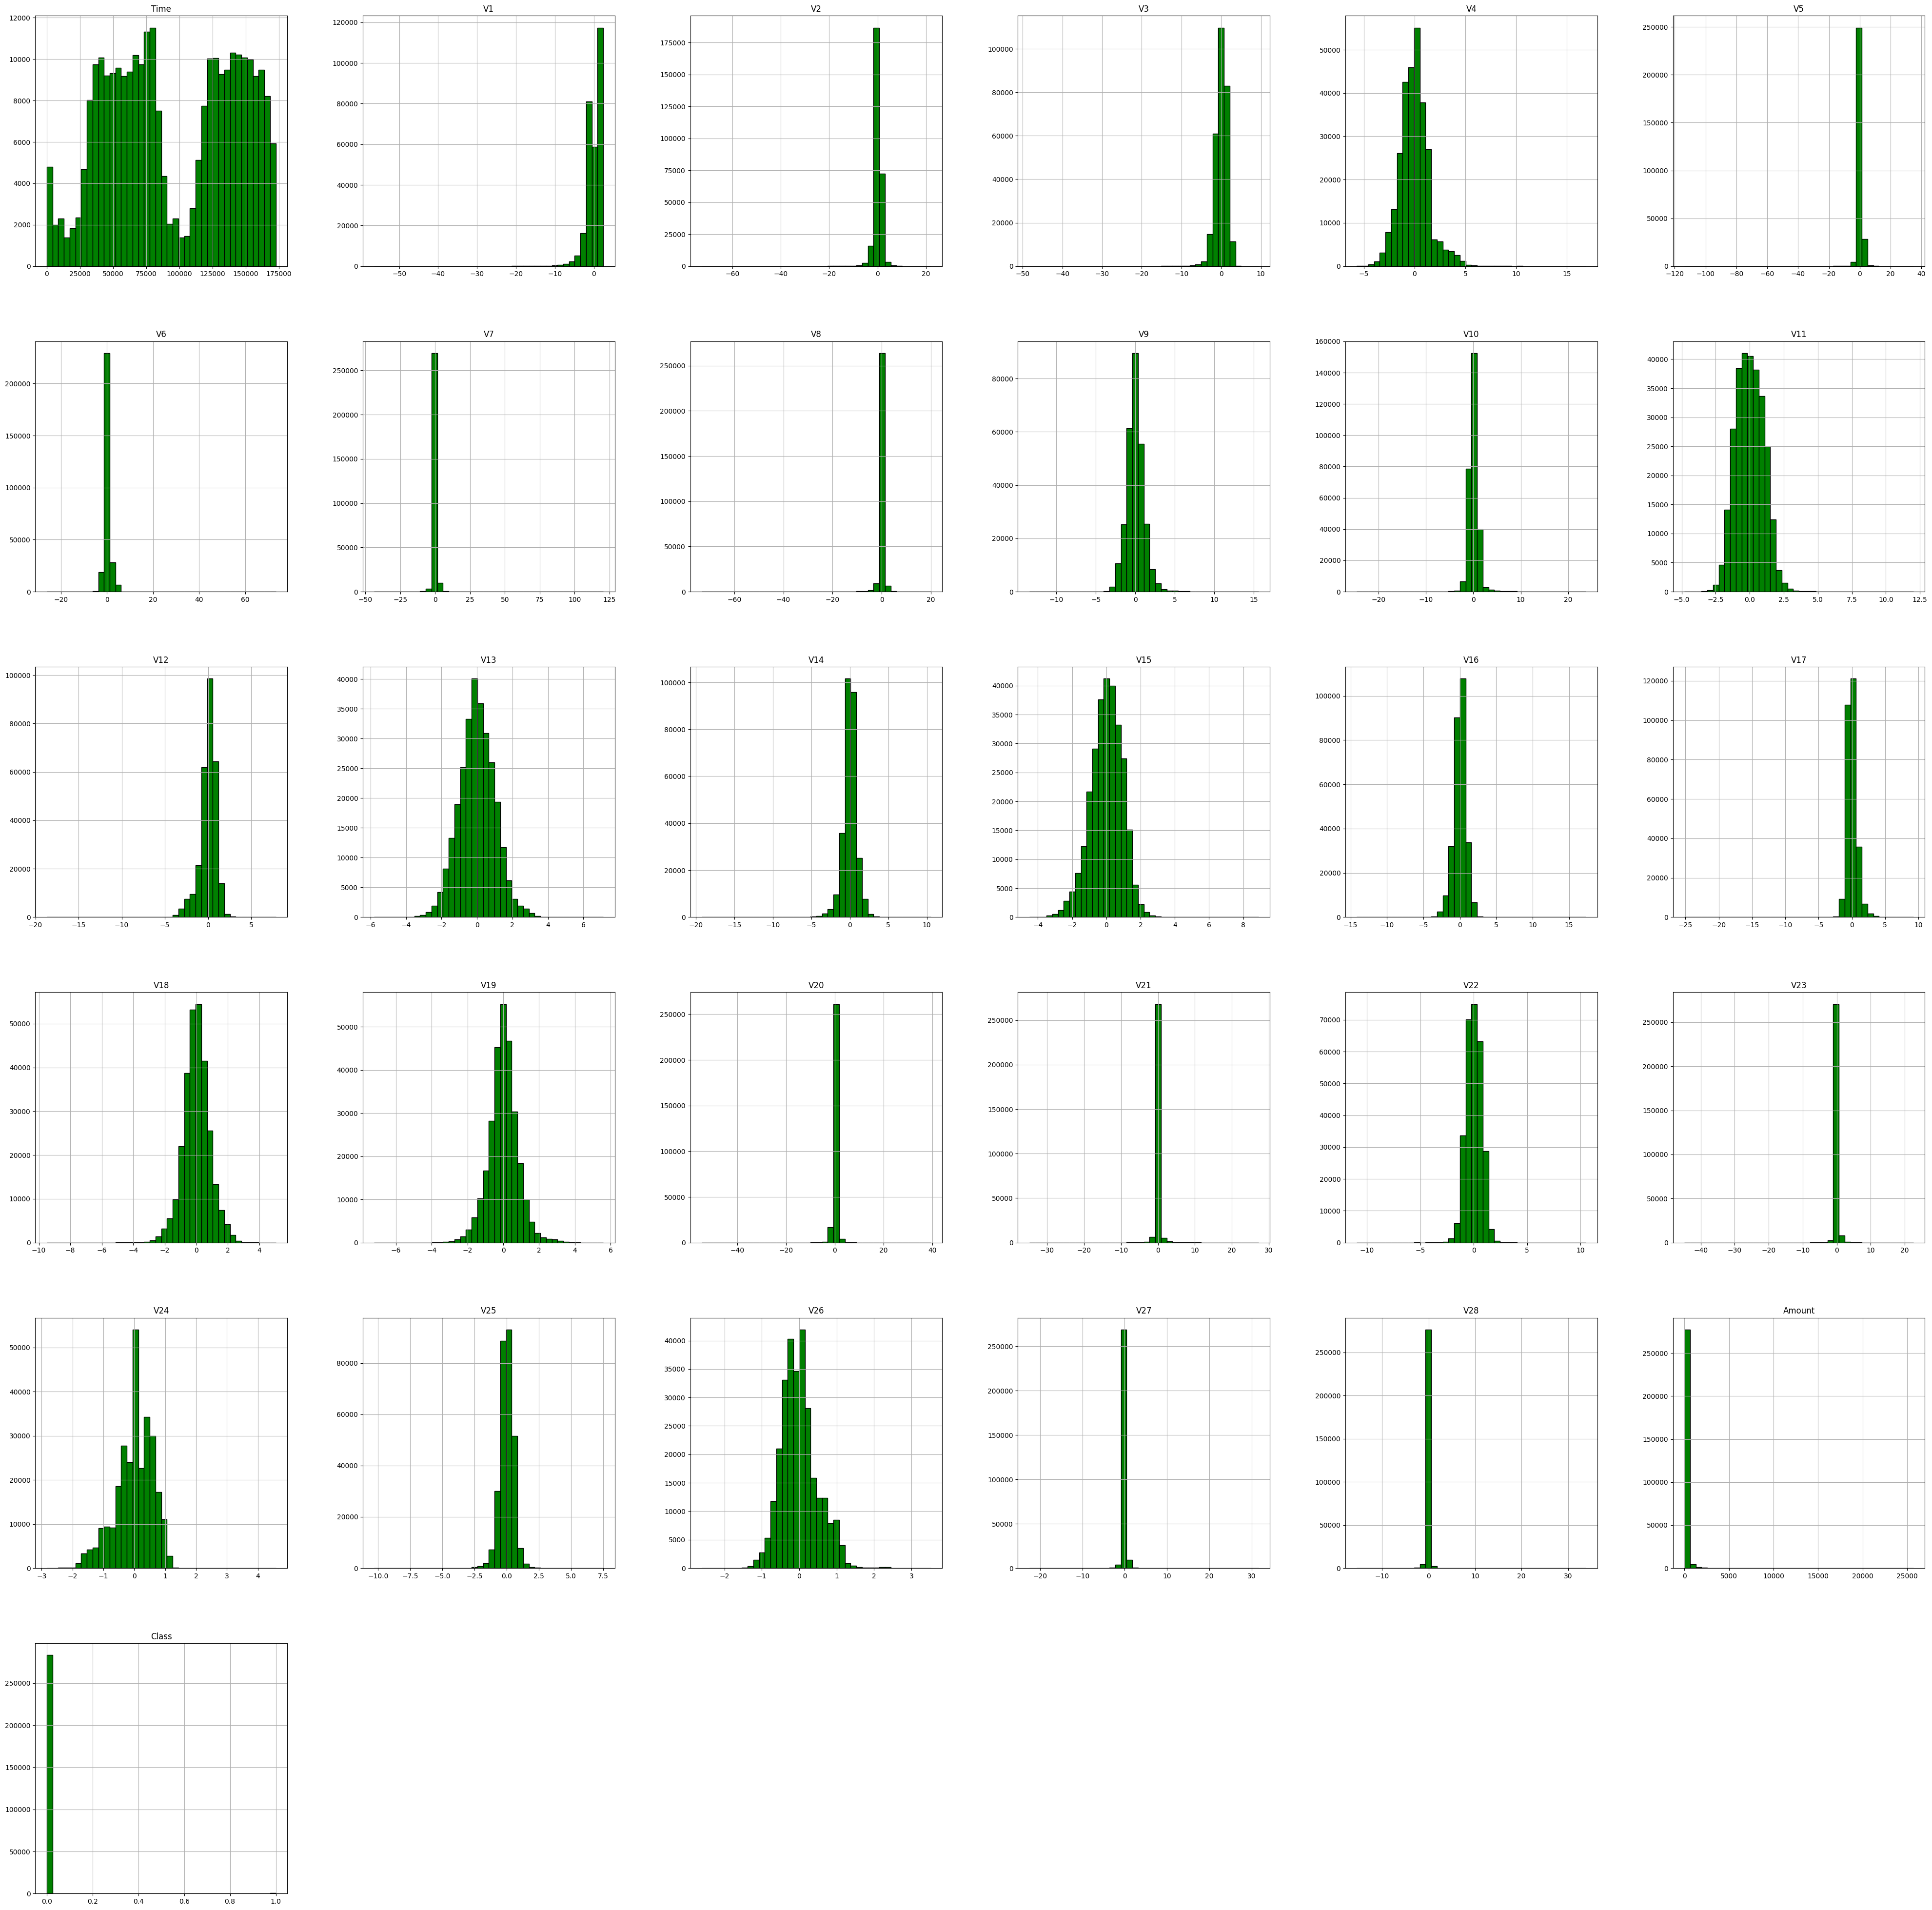

In [19]:
creditcard.hist(bins=40, figsize=(50, 50),color='green', edgecolor='black')

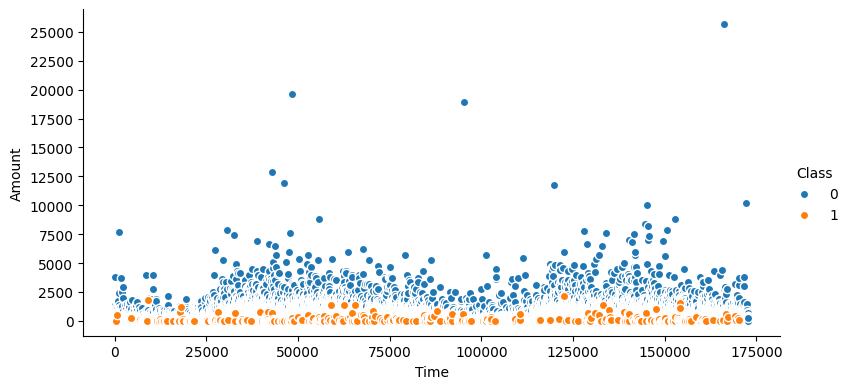

In [20]:
sns.FacetGrid(creditcard, hue="Class",height=4,aspect=2).map(plt.scatter, "Time", "Amount",edgecolor="w").add_legend()
plt.yticks(range(0, 27500, 2500))
plt.show()

Based on the scatter plot we can say that all fraud transactions occur for an amount less than 2500

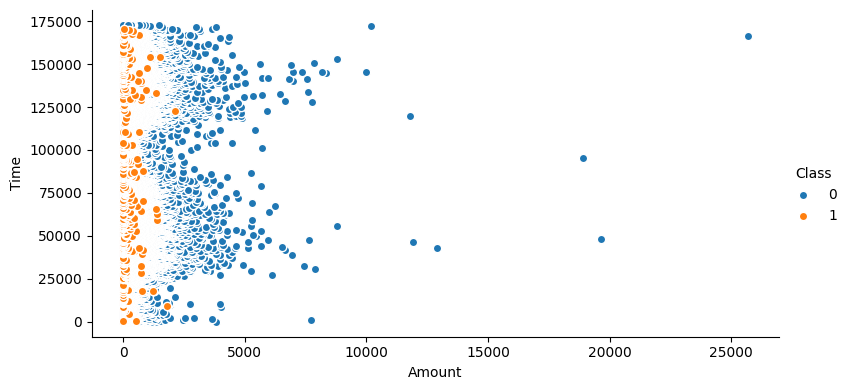

In [21]:
sns.FacetGrid(creditcard, hue="Class",height=4,aspect=2).map(plt.scatter, "Amount", "Time",edgecolor="w").add_legend()
plt.show()

We observe that the fraud transactions are evenly distributed about time.

In [22]:
creditcard['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [23]:
new_df=creditcard[creditcard['Class']==1]

In [24]:
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,...,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.0
mean,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860,1.0
std,48636.179973,6.593145,4.122500,6.909647,2.871523,5.278831,1.715347,6.858024,5.585950,2.465047,...,2.731191,1.181295,1.508570,0.517900,0.806785,0.463016,1.245779,0.533100,260.211041,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41203.000000,-5.603690,1.145381,-7.926507,2.288644,-4.278983,-2.450444,-6.989195,-0.161518,-3.796760,...,0.027935,-0.521934,-0.341881,-0.436539,-0.320311,-0.263078,-0.015551,-0.097223,1.000000,1.0
50%,73408.000000,-2.271755,2.617105,-4.875397,4.100098,-1.372245,-1.420468,-2.902079,0.617738,-2.099049,...,0.573898,0.055179,-0.075034,-0.061263,0.077913,0.012792,0.394682,0.145895,9.820000,1.0
75%,129095.000000,-0.361428,4.571743,-2.171454,6.290918,0.260821,-0.413647,-0.907188,1.709417,-0.788388,...,1.192694,0.616383,0.287659,0.282030,0.463827,0.395528,0.821048,0.372393,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


We see that the maximum Amount for fraud transactions is 2125.This confirms that all fraud transactions occur for an amount less than 2500

Balancing of imbalance dataset using **SMOTE**

In [25]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(creditcard.drop('Class', axis=1),creditcard['Class'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [26]:
oversampled

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,0,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,0,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,0,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566501,1,41183.445750,-7.151786,5.337862,-10.524210,6.638176,-7.107253,-3.688276,-11.629728,4.641323,...,0.865194,2.101089,-0.223411,0.029599,0.393875,-0.049155,0.544700,1.306198,0.223600,17.434148
566502,1,14264.057012,-4.705909,8.250299,-14.559164,9.787990,-4.117161,-3.169121,-10.169571,4.500750,...,1.306372,1.988732,0.194092,0.480124,-1.079562,-0.444215,0.557467,1.234855,0.627900,1.699263
566503,1,135064.971368,0.407366,1.352354,-4.892782,3.554728,-1.282114,-1.271505,-0.977517,0.462476,...,0.997144,0.765180,0.703300,0.814076,0.814930,-0.300969,0.168339,0.236775,0.037244,282.964802
566504,1,109361.849259,0.580032,2.773047,-5.790024,5.606953,0.398480,-0.621865,-2.954884,0.837074,...,0.375281,0.311488,-0.810361,-0.067584,-0.632356,0.414552,0.073243,0.736440,0.358067,4.145185


Considering only 50% of the oversampled data:

In [27]:
sampled_data = oversampled.sample(frac=0.5, random_state=42)

In [28]:
sampled_data['Class'].value_counts()

1    141667
0    141586
Name: Class, dtype: int64

**Train-Test Split**

In [29]:
from sklearn.model_selection import train_test_split
X = sampled_data.drop(labels='Class', axis=1) # Features
y = sampled_data.loc[:,'Class']               # Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
493365,135096.823220,0.656955,0.662076,-3.955470,2.377322,-1.283884,-0.945847,-0.676853,0.331021,-0.609022,...,0.883528,0.620822,0.638078,0.759375,0.767664,-0.332284,0.111191,0.128653,-0.020077,283.403828
254247,157111.000000,-0.447689,-0.028991,0.182111,-1.449836,-0.353178,-0.491509,-0.225113,0.481682,0.416145,...,0.044119,0.486152,1.216192,0.186566,-0.328831,-1.454870,0.565896,0.116237,0.151259,60.000000
459600,159299.278744,-4.660873,-3.573830,-4.027247,4.036941,2.153669,-3.614604,-2.824865,0.431616,-0.775355,...,1.631944,0.941962,0.040710,0.580943,-0.098196,-0.576476,-0.675134,-0.216542,-0.431441,238.318365
94783,65184.000000,-3.760743,3.033427,-0.807428,1.137522,-1.642560,1.570351,-2.241837,3.200501,0.195486,...,0.242138,-0.297501,-0.707874,0.031070,-1.328928,0.526416,-0.273190,0.224071,0.075731,2.150000
135229,81379.000000,-1.199705,1.503080,1.255783,-0.194028,-0.325379,-0.741278,0.465003,0.264679,-0.382181,...,0.346112,-0.229213,-0.436465,0.007300,0.523698,-0.136969,0.022354,0.194879,-0.055836,8.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537042,18153.913902,-12.700978,4.415591,-13.578584,9.992089,-3.028593,-4.218088,-20.781080,-0.053230,-4.938031,...,-1.458703,-1.438773,-1.112766,-15.928999,0.255989,-3.735670,0.153908,2.979070,-0.821214,960.768194
4043,3734.000000,1.039929,0.307864,2.093339,2.883204,-0.845193,0.623587,-0.930041,0.201726,1.302293,...,-0.139794,0.103677,0.760714,0.017571,0.387405,0.207814,0.112389,0.056448,0.037821,5.880000
564044,131375.858003,0.194367,-0.451995,-2.166252,3.138289,-0.056617,-0.533275,2.098105,-0.537785,-0.954213,...,0.845551,0.239931,-0.245872,-0.384750,-0.117191,0.134578,-0.210002,-0.079224,0.036260,642.869089
191134,129423.000000,-0.696707,0.476058,1.447932,-0.253160,0.863916,-0.695374,0.988713,-0.327136,0.109320,...,0.102831,0.060921,0.472814,-0.608219,-0.062354,1.004823,0.041099,-0.136362,-0.169946,7.390000


To find the correlation between the input features and the target columns

In [31]:
from sklearn.feature_selection import mutual_info_classif
pd.Series(data=mutual_info_classif(X_train, y_train, discrete_features=False, random_state=1), index=X_train.columns).sort_values(ascending=False)

V14       0.535960
V10       0.468882
V12       0.464417
V17       0.436935
V4        0.435516
V11       0.420481
V3        0.390517
V16       0.347617
Amount    0.336639
V7        0.312880
V2        0.291129
V9        0.276548
Time      0.241411
V27       0.235812
V21       0.227080
V1        0.220155
V18       0.206042
V6        0.180375
V28       0.177201
V8        0.157435
V5        0.149631
V20       0.111104
V19       0.098024
V24       0.061536
V23       0.056353
V26       0.047796
V25       0.028059
V22       0.024763
V15       0.013372
V13       0.013188
dtype: float64

We see that V14, V10, V4, V12 and V17 are the most correlated features after resolving class imbalance using Synthetic Minority Oversampling.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [33]:
def report(grid_search,X_test,y_test):
  print("Best Hyperparameters:", grid_search.best_params_)
  print("Best Score:", grid_search.best_score_)

  best_logistic_classifier = grid_search.best_estimator_
  y_pred = best_logistic_classifier.predict(X_test)#prediction here

  from sklearn.metrics import accuracy_score, classification_report
  from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
  accuracy = accuracy_score(y_test, y_pred)
  classification_rep = classification_report(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print("Mean Squared Error (MSE):", mse)
  print("R-squared (R2) Score:", r2)


  print("Accuracy:", accuracy)
  print("Classification Report:\n", classification_rep)

**Logistic Regression**



In [34]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()
param_grid = {
    'penalty': ['l2'],
    'class_weight': ['balanced'],
    'solver':['lbfgs']
}
grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid,scoring=make_scorer(matthews_corrcoef),n_jobs=-1, pre_dispatch='2*n_jobs', cv=5,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [35]:
grid_search.predict(X_train)

array([1, 0, 1, ..., 1, 0, 1])

In [36]:
report(grid_search,X_test,y_test)

Best Hyperparameters: {'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.9588574418519767
Mean Squared Error (MSE): 0.021759084918094522
R-squared (R2) Score: 0.9129628703915929
Accuracy: 0.9782409150819055
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     42360
           1       0.99      0.97      0.98     42616

    accuracy                           0.98     84976
   macro avg       0.98      0.98      0.98     84976
weighted avg       0.98      0.98      0.98     84976



In [ ]:
import pickle
# Define the filename for the pickle file
filename1 = 'model_sarimax_fit1.pkl'

# Open the file in binary write mode and dump the model
with open(filename1, 'wb') as file:
    pickle.dump(grid_search,file)

In [ ]:
# Load the pickled model from the file
with open(filename1, 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the loaded model for predictions
# For example: loaded_model.predict(...)

In [ ]:
loaded_model.predict(X_train)

**Decision Tree Classifier**

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt_Regressor = DecisionTreeClassifier()
param_grid = {
    'max_depth':[4],
    'criterion':['entropy']
}


grid_search1 = GridSearchCV(estimator=dt_Regressor, param_grid=param_grid, scoring=make_scorer(matthews_corrcoef),n_jobs=-1, pre_dispatch='2*n_jobs', cv=5,verbose=1)
grid_search1.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [4]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [38]:
report(grid_search1,X_test,y_test)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 4}
Best Score: 0.9272149966070407
Mean Squared Error (MSE): 0.03774006778384485
R-squared (R2) Score: 0.8490383587592419
Accuracy: 0.9622599322161551
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     42360
           1       0.98      0.94      0.96     42616

    accuracy                           0.96     84976
   macro avg       0.96      0.96      0.96     84976
weighted avg       0.96      0.96      0.96     84976



**kNearestNeighbour Classifier**

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
param_grid = {
   'p': [2]

}
grid_search2 = GridSearchCV(estimator=knn_classifier, param_grid=param_grid,scoring=make_scorer(matthews_corrcoef),n_jobs=-1, pre_dispatch='2*n_jobs', cv=5,verbose=1)
grid_search2.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'p': [2]}, scoring=make_scorer(matthews_corrcoef),
             verbose=1)

In [40]:
report(grid_search2,X_test,y_test)

Best Hyperparameters: {'p': 2}
Best Score: 0.9954209927430309
Mean Squared Error (MSE): 0.0020123328939935983
R-squared (R2) Score: 0.9919505953688277
Accuracy: 0.9979876671060064
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42360
           1       1.00      1.00      1.00     42616

    accuracy                           1.00     84976
   macro avg       1.00      1.00      1.00     84976
weighted avg       1.00      1.00      1.00     84976



**Random Forest Classifier**

In [41]:
from sklearn.ensemble import RandomForestClassifier
randomf_classifier = RandomForestClassifier(random_state=1)
param_grid = {
   'n_estimators': [75]

}
grid_search3 = GridSearchCV(estimator=randomf_classifier, param_grid=param_grid,scoring=make_scorer(matthews_corrcoef),n_jobs=-1, pre_dispatch='2*n_jobs', cv=5,verbose=1)
grid_search3.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [42]:
report(grid_search3,X_test,y_test)

Best Hyperparameters: {'n_estimators': 75}
Best Score: 0.9995763973710348
Mean Squared Error (MSE): 0.0003530408585953681
R-squared (R2) Score: 0.9985878237489172
Accuracy: 0.9996469591414047
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42360
           1       1.00      1.00      1.00     42616

    accuracy                           1.00     84976
   macro avg       1.00      1.00      1.00     84976
weighted avg       1.00      1.00      1.00     84976

